In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
df = pd.read_csv('/Users/youziya/Downloads/Customer_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data preprocessing
1. missing values
Check if there's any missing value. Minimum payments has 313 missing values and credit limit has 1, we filled it with the median value of minimum payments
--we used median as median is less sensitive to dataset than mean.

2. Feature Scaling
(Before we process feature scaling, we dropped the cust_id column as it's not useful for our clustering)

3. PCA analysis 
It appears that the first 6-7 principal components explain a significant portion of the variance in the data.
--impact: Using fewer components can make the clustering process more efficient and easier to visualize.
Each feature contributes equally to the distance metric after scaling data.
PCA can filter out noise data and make clusters more precise.


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Plotting the distribution of CREDIT_LIMIT and MINIMUM_PAYMENTS
plt.figure(figsize=(12, 5))

# Plot for CREDIT_LIMIT
plt.subplot(1, 2, 1)
sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True, color='skyblue')
plt.title('CREDIT_LIMIT Distribution')

# Plot for MINIMUM_PAYMENTS
plt.subplot(1, 2, 2)
sns.histplot(df['MINIMUM_PAYMENTS'].dropna(), bins=30, kde=True, color='salmon')
plt.title('MINIMUM_PAYMENTS Distribution')

plt.show()


In [ ]:
# These two graphs are all right skewed, it's better to use mediam because mediam is less sensitive to outliers than mean.Filling missing values with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [13]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [14]:
df.dropna(inplace=True)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [19]:
#Feature scaling
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [20]:
#PCA analysis
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [2.72311770e-01 2.03743076e-01 8.91833372e-02 7.57360860e-02
 6.27661816e-02 5.71278613e-02 4.91618788e-02 4.21073427e-02
 3.68169669e-02 3.08150790e-02 2.36380362e-02 1.77453962e-02
 1.42671026e-02 1.17865972e-02 1.00809717e-02 2.71162672e-03
 6.90045972e-07]
Cumulative explained variance ratio: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831
 0.81003019 0.85213753 0.8889545  0.91976958 0.94340762 0.96115301
 0.97542011 0.98720671 0.99728768 0.99999931 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144,-0.073513,-0.197110,0.137454,0.046683,-0.000168
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741,-0.055471,-0.696165,-0.558965,-0.085698,0.000007
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779,0.685713,0.008418,0.221006,0.516991,0.000021
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286,-0.031707,-0.051778,0.290624,-0.071753,-0.000074
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570,0.491517,-0.082598,0.163826,0.131205,-0.000344


In [23]:
# let's reduce to 6 components as 6 compoents capture 76% variance
# Perform PCA
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.27231177 0.20374308 0.08918334 0.07573609 0.06276618 0.05712786]
Cumulative explained variance ratio: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831]


,0,1,2,3,4,5
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879


### EDA analysis


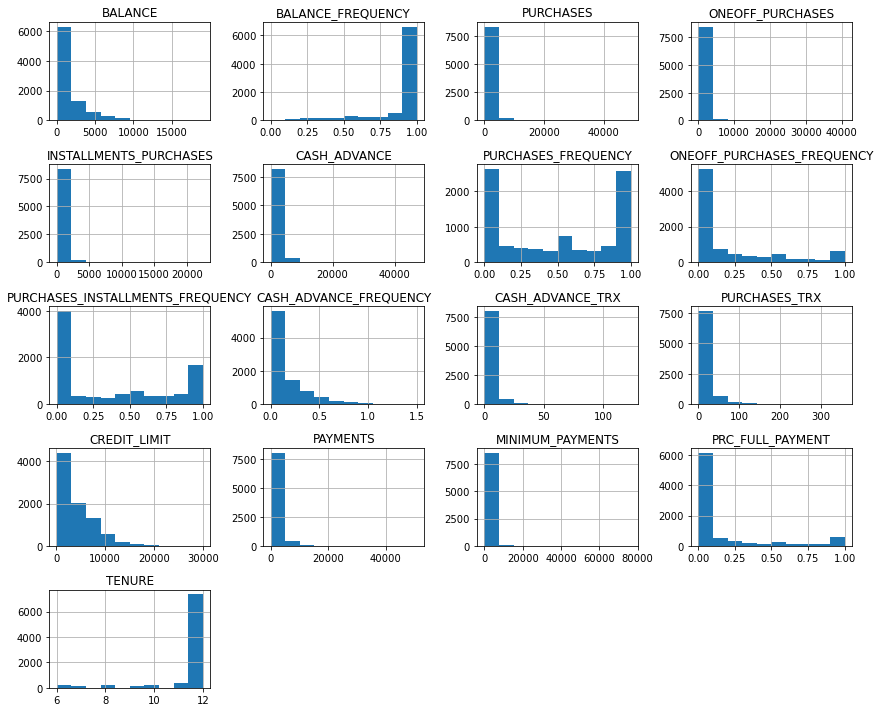

In [27]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [2]:
def show_boxplot(df):
plt.rcParams['figure.figsize'] = [14,6]
sns.boxplot(data = df, orient="v")
plt.title("Outliers Distribution", fontsize = 16)
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(df)

SyntaxError: invalid syntax (1148650388.py, line 1)

In [ ]:
def remove_outliers(df):
   
df = df.copy()
   
for col in list(df.columns):
 
      Q1 = df[str(col)].quantile(0.05)
      Q3 = df[str(col)].quantile(0.95)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR
 
      df = df[(df[str(col)] >= lower_bound) & 

        (df[str(col)] <= upper_bound)]
   
return df


In [ ]:
show_boxplot(df)

In [ ]:
df.shape

In [ ]:
def remove_outliers(data):
   
df = data.copy()
   
for col in list(df.columns):
 
      Q1 = df[str(col)].quantile(0.05)
      Q3 = df[str(col)].quantile(0.95)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR
 
      df = df[(df[str(col)] >= lower_bound) & 

        (df[str(col)] <= upper_bound)]
   
return df



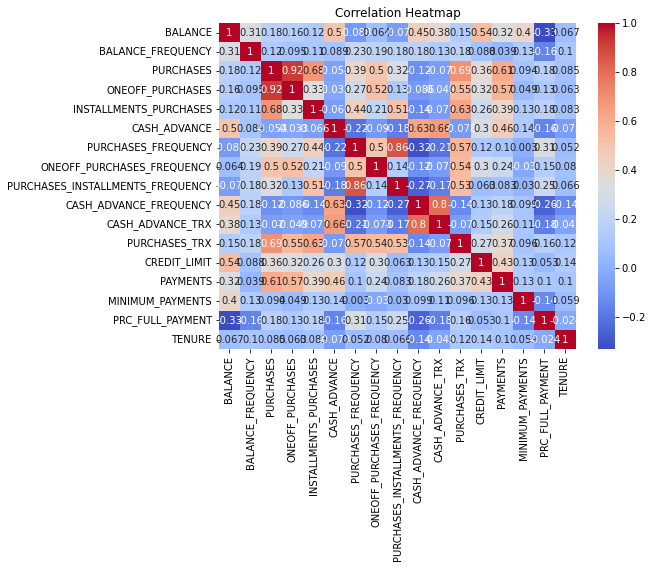

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
descriptive_stats = df.describe()
print(descriptive_stats)

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x = df['y'])
plt.title('Box Plot of Data with Outliers')
plt.show()

In [ ]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'TEUNRE')

### Clustering

In [ ]:
grouped_data = df.groupby('TENURE')
average_curves = grouped_data.agg('mean')
average_curves.shape

In [ ]:
average_curves

In [ ]:
average_curves['12'].plot()

In [ ]:
avg_curves_norm = average_curves/average_curves.mean()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [ ]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
avg_curves_norm

In [ ]:
X = avg_curves_norm.copy()
X = np.array(X.T)

In [ ]:
X

In [ ]:
del silhouette_score

In [ ]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Applying K-means with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_


In [ ]:
# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


In [ ]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()


In [ ]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()
